# Part II - What Are The Determinant Of Global salaries in AI/ML and Big Data
## by Nicholas Seswa Anungo

## Investigation Overview

In this investigation, I wanted to look at the various variables found in the dataset that could be used to predict the salary of AI/ML and Big Data jobs. The main focus was on the three features: work_year, company_size,and experience_level.

## Dataset Overview

The data consists of information regarding salary anonymously from professionals all over the world in the AI/ML and Big Data space. The dataset can be found in the this ai-jobs.net website. The 'salary' and 'salary_currency' columns were dropped to avoid iteration of the information since we had a column of salary_in_usd.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
Salary =pd.read_csv('Salary.csv')

In [3]:
#loading the background theme to be used in the plots
sb.set_theme()

In [4]:
#Using a z-score method to detect the outliers in the salary_in_usd column: 
Salary['z_score'] = (Salary['salary_in_usd'] - Salary['salary_in_usd'].mean()) / Salary['salary_in_usd'].std()
Salary.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,z_score
0,2022,Senior-level,Full-time,Data Engineer,195700,US,On-site,US,Medium,1.129387
1,2022,Senior-level,Full-time,Data Engineer,130500,US,On-site,US,Medium,0.171046
2,2022,Senior-level,Full-time,ML Engineer,130000,US,Remote,US,Medium,0.163697
3,2022,Senior-level,Full-time,ML Engineer,84000,US,Remote,US,Medium,-0.512433
4,2022,Medium-level,Full-time,Data Operations Engineer,100000,US,Remote,US,Medium,-0.277257


In [5]:
#Using the calculated z-score to mark the outliers if the z-score is above 3 or below -3.
Salary[(Salary['z_score'] < -3) | (Salary['z_score'] > 3)]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,z_score
641,2022,Excutive-level,Full-time,Data Engineer,324000,US,Remote,US,Medium,3.015202
695,2022,Senior-level,Full-time,Data Analytics Lead,405000,US,Remote,US,Large,4.205779
700,2022,Senior-level,Full-time,Applied Data Scientist,380000,US,Remote,US,Large,3.838317
754,2020,Medium-level,Full-time,Research Scientist,450000,US,On-site,US,Medium,4.867210
811,2021,Medium-level,Full-time,Financial Data Analyst,450000,US,Remote,US,Large,4.867210
910,2021,Excutive-level,Contract,Principal Data Scientist,416000,US,Remote,US,Small,4.367462
933,2020,Excutive-level,Full-time,Director of Data Science,325000,US,Remote,US,Large,3.029900
939,2021,Excutive-level,Full-time,Principal Data Engineer,600000,US,Remote,US,Large,7.071982
985,2021,Medium-level,Full-time,Applied Machine Learning Scientist,423000,US,Hybrid,US,Large,4.470351
988,2020,Senior-level,Full-time,Data Scientist,412000,US,Remote,US,Large,4.308668


In [6]:
#To remove these outlers in the salary_in_usd column
new_df = Salary[(Salary['z_score'] < 3) & (Salary['z_score'] > -3)]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of salary_in_usd

The salary_in_usd in the dataset take on a range of values, from about  2324 𝑎𝑡 𝑡ℎ𝑒 𝑙𝑜𝑤𝑒𝑠𝑡,𝑡𝑜 𝑎𝑏𝑜𝑢𝑡 600000 at the highest. Most comon salary_in_usd recorded ranges from 500k to 1500k.

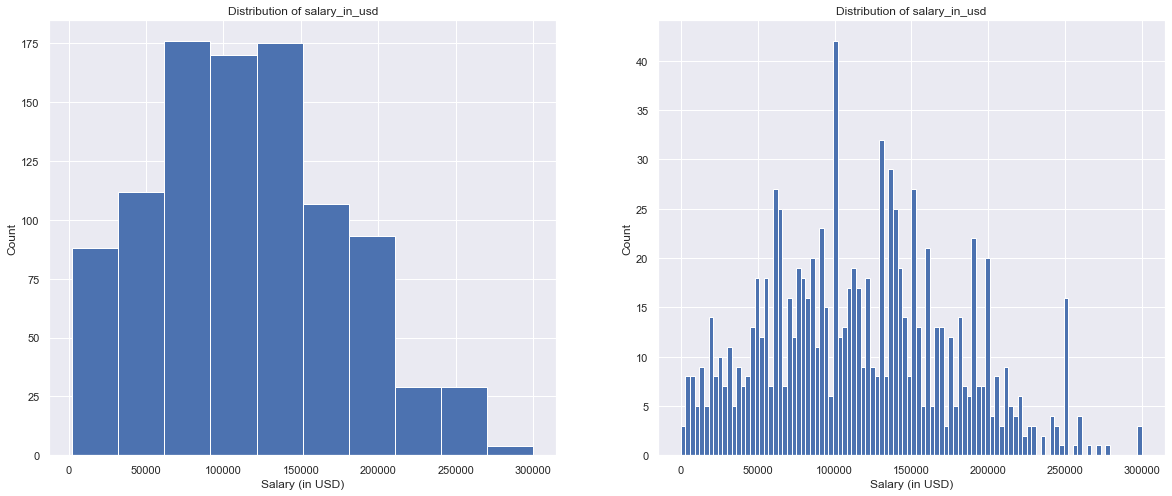

In [7]:
# Resize the chart, and have two plots side-by-side
plt.figure(figsize = [20, 8]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
plt.hist(data = new_df, x = 'salary_in_usd')
plt.title('Distribution of salary_in_usd')
plt.ylabel('Count')
plt.xlabel('Salary (in USD)');

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, new_df['salary_in_usd'].max()+3000, 3000)
plt.hist(data = new_df, x = 'salary_in_usd', bins = bins)
plt.title('Distribution of salary_in_usd')
plt.ylabel('Count')
plt.xlabel('Salary (in USD)');

## Distribution of salary_in_usd by work_year
In the dataset, most of the salary is distributed in 2022, followed by 2021 and lastly the 2020. This distribution indicates that most of the salary payment was made in 2022, which means that most of the jobs were recorded in 2022, then 2020 with the least numbers jobs being recorded.

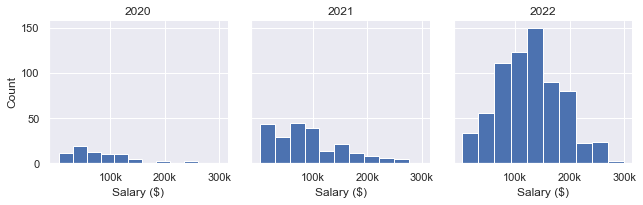

In [8]:
#Plotting facetGrid of histograme of remote_ratio and salary_in_usd
g = sb.FacetGrid(data = new_df, col = 'work_year', col_wrap=3)
g.map(plt.hist, "salary_in_usd")
g.set_titles('{col_name}')
g.set_xlabels('Salary ($)')
g.set_ylabels('Count')
plt.xticks([1e5, 2e5, 3e5], ['100k', '200k', '300k']);

## Distribution of salary_in_usd by work_year

In the dataset, most of the salary is distributed in medium company size, followed by large company and the lastly the small company. This distribution indicates that most of the payment salary was made in medium companies, which relates to the number jobs being highest in the said company size.

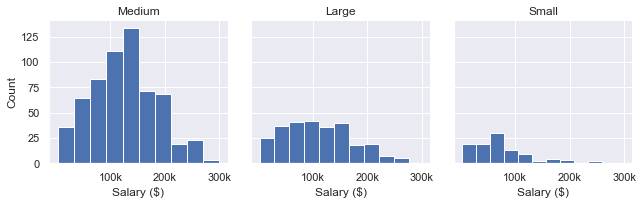

In [9]:
#Plotting facetGrid of histograme of company_size and salary_in_usd
g = sb.FacetGrid(data = new_df, col = 'company_size', col_wrap=3)
g.map(plt.hist, "salary_in_usd")
g.set_titles('{col_name}')
g.set_xlabels('Salary ($)')
g.set_ylabels('Count')
plt.xticks([1e5, 2e5, 3e5], ['100k', '200k', '300k']);

## Distribution of salary_in_usd by company_size and experience_level
The boxplots above reveled that in Senior-level experience more salaries was recorded in the medium size and large companies, the least being small sized companies. In Medium-level experience, most of the salaries was recorded in both medium sized and large sized companies, with small recorded in small sized companies. In Entry-level, more salary was recorded by small companies, followed closely by large companies, least being medium companies. In Excutive-level, the medium and large companies recorded the highest salary, the least being small companies.

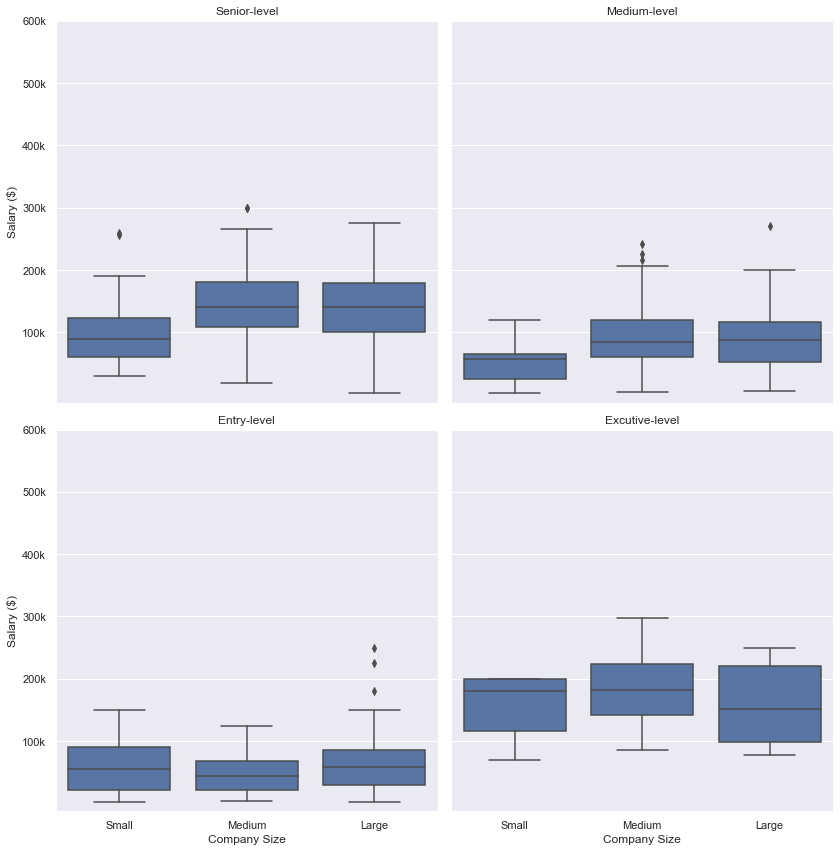

In [10]:
#Plotting facetGrid of boxnplot of company_size, experience_level and salary_in_usd
order = ['Small', 'Medium', 'Large']
g = sb.FacetGrid(data = new_df, col = 'experience_level', height = 6, col_wrap=2, row_order=None)
g.map(sb.boxplot, 'company_size', 'salary_in_usd', order =order)
g.set_titles('{col_name}')
plt.yticks([1e5, 2e5, 3e5, 4e5, 5e5, 6e5], ['100k', '200k', '300k', '400k', '500k', '600k'])
g.set_xlabels('Company Size')
g.set_ylabels('Salary ($)');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [12]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 670961 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\envs\Dog_ratings\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\pc\anaconda3\envs\Dog_ratings\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\pc\anaconda3\envs\Dog_ratings\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\pc\anaconda3\envs\Dog_ratings\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\pc\anaconda3\envs\Dog_ratings\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in conve

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 